# Fraud Detection System for Online Transactions
Project 4: Machine Learning Integration

In [1]:
# Import dependencies

import time
import datetime
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import the data

file_path1 = Path("Resources/test_identity.csv")
file_path2 = Path("Resources/test_transaction.csv")
file_path3 = Path("Resources/train_identity.csv")
file_path4 = Path("Resources/train_transaction.csv")

In [3]:
# Read the data

test_identity = pd.read_csv(file_path1)
test_transaction = pd.read_csv(file_path2)
train_identity = pd.read_csv(file_path3)
train_transaction = pd.read_csv(file_path4)

In [4]:
## TBC: Find column names.
# Load in data

# columns = [
#     'age',
#     'workclass',
#     'fnlwgt',
#     'education',
#     'education_num',
#     'occupation',
#     'relationship',
#     'capital-gain',
#     'capital-loss',
#     'hours-per-week',
#     'native-country',
#     'income'
    
# ]

#test_transaction2 = pd.read_csv('../Resources/data.csv', header=None, names=columns, index_col=False)
# test_transaction2

In [5]:
test_identity.head()

,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [6]:
test_transaction.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning
Examine the characteristics of each dataset.
Remove irrelevant data, missing values, or duplicates.

### Check data types

In [7]:
test_identity.dtypes 

TransactionID      int64
id-01            float64
id-02            float64
id-03            float64
id-04            float64
id-05            float64
id-06            float64
id-07            float64
id-08            float64
id-09            float64
id-10            float64
id-11            float64
id-12             object
id-13            float64
id-14            float64
id-15             object
id-16             object
id-17            float64
id-18            float64
id-19            float64
id-20            float64
id-21            float64
id-22            float64
id-23             object
id-24            float64
id-25            float64
id-26            float64
id-27             object
id-28             object
id-29             object
id-30             object
id-31             object
id-32            float64
id-33             object
id-34             object
id-35             object
id-36             object
id-37             object
id-38             object
DeviceType        object


In [8]:
test_transaction.dtypes

TransactionID       int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
card1               int64
                   ...   
V335              float64
V336              float64
V337              float64
V338              float64
V339              float64
Length: 393, dtype: object

In [9]:
column_test_transaction = test_transaction.columns.tolist()
print(column_test_transaction)

['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83',

In [10]:
# count the number of rows
test_transaction_rows = len(test_transaction)

# print the result
print(test_transaction_rows)

506691


In [11]:
train_identity.dtypes

TransactionID      int64
id_01            float64
id_02            float64
id_03            float64
id_04            float64
id_05            float64
id_06            float64
id_07            float64
id_08            float64
id_09            float64
id_10            float64
id_11            float64
id_12             object
id_13            float64
id_14            float64
id_15             object
id_16             object
id_17            float64
id_18            float64
id_19            float64
id_20            float64
id_21            float64
id_22            float64
id_23             object
id_24            float64
id_25            float64
id_26            float64
id_27             object
id_28             object
id_29             object
id_30             object
id_31             object
id_32            float64
id_33             object
id_34             object
id_35             object
id_36             object
id_37             object
id_38             object
DeviceType        object


In [12]:
train_transaction.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
V335              float64
V336              float64
V337              float64
V338              float64
V339              float64
Length: 394, dtype: object

In [13]:
column_train_transaction = train_transaction.columns.tolist()
print(column_train_transaction)

['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V

In [14]:
# count the number of rows
train_transaction_rows = len(train_transaction)

# print the result
print(train_transaction_rows)

590540


### Check for missing values

In [15]:
## for test_identity
print(test_identity.count())
print(test_identity.isnull().values.any())

TransactionID    141907
id-01            141907
id-02            136976
id-03             66481
id-04             66481
id-05            134750
id-06            134750
id-07              5059
id-08              5059
id-09             74338
id-10             74338
id-11            136778
id-12            141907
id-13            130286
id-14             71357
id-15            136977
id-16            125747
id-17            135966
id-18             50875
id-19            135906
id-20            135633
id-21              5059
id-22              5062
id-23              5062
id-24              4740
id-25              5039
id-26              5047
id-27              5062
id-28            136778
id-29            136778
id-30             70659
id-31            136625
id-32             70671
id-33             70671
id-34             72175
id-35            136977
id-36            136977
id-37            136977
id-38            136977
DeviceType       136931
DeviceInfo       115057
dtype: int64
Tru

In [16]:
## for test_transaction
print(test_transaction.count())
print(test_transaction.isnull().values.any())

TransactionID     506691
TransactionDT     506691
TransactionAmt    506691
ProductCD         506691
card1             506691
                   ...  
V335               76431
V336               76431
V337               76431
V338               76431
V339               76431
Length: 393, dtype: int64
True


In [17]:
## for train_identity
print(train_identity.count())
print(train_identity.isnull().values.any())

TransactionID    144233
id_01            144233
id_02            140872
id_03             66324
id_04             66324
id_05            136865
id_06            136865
id_07              5155
id_08              5155
id_09             74926
id_10             74926
id_11            140978
id_12            144233
id_13            127320
id_14             80044
id_15            140985
id_16            129340
id_17            139369
id_18             45113
id_19            139318
id_20            139261
id_21              5159
id_22              5169
id_23              5169
id_24              4747
id_25              5132
id_26              5163
id_27              5169
id_28            140978
id_29            140978
id_30             77565
id_31            140282
id_32             77586
id_33             73289
id_34             77805
id_35            140985
id_36            140985
id_37            140985
id_38            140985
DeviceType       140810
DeviceInfo       118666
dtype: int64
Tru

In [18]:
## for train_transaction
print(train_transaction.count())
print(train_transaction.isnull().values.any())

TransactionID     590540
isFraud           590540
TransactionDT     590540
TransactionAmt    590540
ProductCD         590540
                   ...  
V335               82351
V336               82351
V337               82351
V338               82351
V339               82351
Length: 394, dtype: int64
True


#### Any missing data? yes

### Check for duplicate entries

In [19]:
test_identity.duplicated().sum()

0

In [20]:
test_transaction.duplicated().sum()

0

In [21]:
train_identity.duplicated().sum()

0

In [22]:
train_transaction.duplicated().sum()

0

### Merge data

In [23]:
# Check if all Transactions IDs from transaction dataset are in identity dataset.

print(np.sum(train_transaction['TransactionID'].isin(train_identity['TransactionID'].unique())))
print(np.sum(test_transaction['TransactionID'].isin(test_identity['TransactionID'].unique())))

144233
141907


In [24]:
# Merge both the transaction and identity by left
train_df=pd.merge(train_transaction,train_identity,how="left",on="TransactionID")
test_df=pd.merge(test_transaction,test_identity,how="left",on="TransactionID")

In [25]:
# Print Shapes
print("Train Dataset shape: ", train_df.shape)
print("Test Dataset shape: ", test_df.shape)

Train Dataset shape:  (590540, 434)
Test Dataset shape:  (506691, 433)


In [26]:
train_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [27]:
test_df.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Examine summary statistics

In [28]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TransactionID,590540.0,3.282270e+06,1.704744e+05,2987000.000,3134634.750,3282269.500,3429904.25,3.577539e+06
isFraud,590540.0,3.499001e-02,1.837546e-01,0.000,0.000,0.000,0.00,1.000000e+00
TransactionDT,590540.0,7.372311e+06,4.617224e+06,86400.000,3027057.750,7306527.500,11246620.00,1.581113e+07
TransactionAmt,590540.0,1.350272e+02,2.391625e+02,0.251,43.321,68.769,125.00,3.193739e+04
card1,590540.0,9.898735e+03,4.901170e+03,1000.000,6019.000,9678.000,14184.00,1.839600e+04
...,...,...,...,...,...,...,...,...
id_22,5169.0,1.600271e+01,6.897665e+00,10.000,14.000,14.000,14.00,4.400000e+01
id_24,4747.0,1.280093e+01,2.372447e+00,11.000,11.000,11.000,15.00,2.600000e+01
id_25,5132.0,3.296089e+02,9.746109e+01,100.000,321.000,321.000,371.00,5.480000e+02
id_26,5163.0,1.490703e+02,3.210199e+01,100.000,119.000,149.000,169.00,2.160000e+02


In [29]:
test_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TransactionID,506691.0,3.916894e+06,1.462692e+05,3.663549e+06,3790221.5,3916894.00,4043566.5,4170239.0
TransactionDT,506691.0,2.692994e+07,4.756507e+06,1.840322e+07,22771540.5,27204658.00,31348560.5,34214345.0
TransactionAmt,506691.0,1.347256e+02,2.457798e+02,1.800000e-02,40.0,67.95,125.0,10270.0
card1,506691.0,9.957222e+03,4.884961e+03,1.001000e+03,6019.0,9803.00,14276.0,18397.0
card2,498037.0,3.637354e+02,1.586887e+02,1.000000e+02,207.0,369.00,512.0,600.0
...,...,...,...,...,...,...,...,...
id-22,5062.0,1.533682e+01,5.618032e+00,1.100000e+01,14.0,14.00,14.0,44.0
id-24,4740.0,1.316667e+01,3.222440e+00,1.000000e+01,11.0,11.00,15.0,26.0
id-25,5039.0,3.320431e+02,8.635668e+01,1.000000e+02,321.0,321.00,355.0,549.0
id-26,5047.0,1.527529e+02,3.191700e+01,1.000000e+02,137.0,147.00,182.0,216.0


In [33]:
print(f'There are {train_df.isnull().any().sum()} columns in train dataset with missing values.')

There are 414 columns in train dataset with missing values.


In [34]:
print(f'There are {test_df.isnull().any().sum()} columns in test dataset with missing values.')

There are 385 columns in test dataset with missing values.


In [ ]:
# Drop TransactionDT, TransactionID

## Data Exploration

In this competition you are predicting the probability that an online transaction is fraudulent, as denoted by the binary target isFraud.

The data is broken into two files identity and transaction, which are joined by TransactionID.

Note: Not all transactions have corresponding identity information.

##### Categorical Features - Transaction

ProductCD
emaildomain
card1 - card6
addr1, addr2
P_emaildomain
R_emaildomain
M1 - M9

##### Categorical Features - Identity

DeviceType
DeviceInfo
id_12 - id_38

The TransactionDT feature is a timedelta from a given reference datetime (not an actual timestamp).

#### Files

train_{transaction, identity}.csv - the training set
test_{transaction, identity}.csv - the test set (you must predict the isFraud value for these observations)
sample_submission.csv - a sample submission file in the correct format

###### Focus on train_df
Not all transactions have corresponding identity information.

Considerable imbalance in dataset.

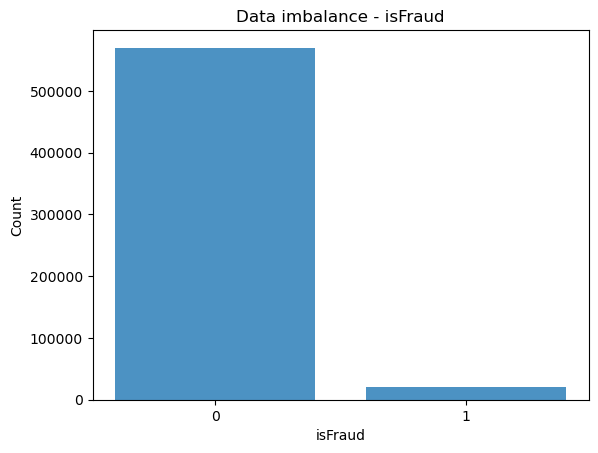

In [39]:
x = train_df['isFraud'].value_counts().index
y = train_df['isFraud'].value_counts().values

fig, ax = plt.subplots()
ax.bar(x, y, alpha=0.8)

ax.set_title('Data imbalance - isFraud')
ax.set_ylabel('Count')
ax.set_xlabel('isFraud')
ax.set_xticks(x)

plt.show()

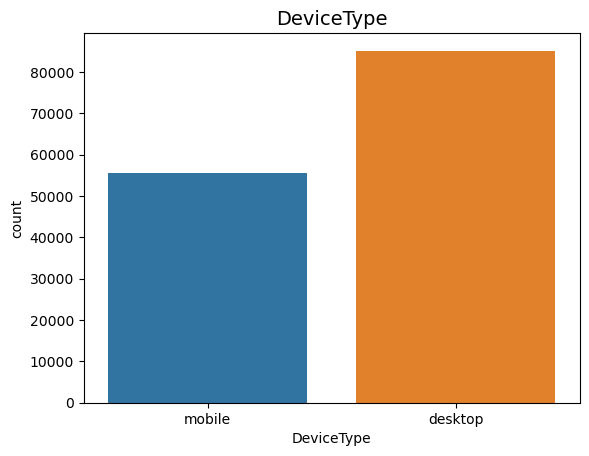

In [40]:
### Device Type
ax = sns.countplot(x="DeviceType", data=train_df)
ax.set_title('DeviceType', fontsize=14)
plt.show()

In [41]:
print ("Unique Devices = ",train_df['DeviceInfo'].nunique())
train_df['DeviceInfo'].value_counts().head()

Unique Devices =  1786


Windows        47722
iOS Device     19782
MacOS          12573
Trident/7.0     7440
rv:11.0         1901
Name: DeviceInfo, dtype: int64

In [42]:
cards = ['card1', 'card2', 'card3', 'card4', 'card5', 'card6']
for i in cards:
    print ("Unique ",i, " = ",train_df[i].nunique())

Unique  card1  =  13553
Unique  card2  =  500
Unique  card3  =  114
Unique  card4  =  4
Unique  card5  =  119
Unique  card6  =  4


In [ ]:
# Fraud by card type
fig, ax = plt.subplots(1, 4, figsize=(25,5))

sns.countplot(x="card4", ax=ax[0], data=train_df.loc[train_df['isFraud'] == 0])
ax[0].set_title('card4 isFraud=0', fontsize=14)
sns.countplot(x="card4", ax=ax[1], data=train_df.loc[train_df['isFraud'] == 1])
ax[1].set_title('card4 isFraud=1', fontsize=14)
sns.countplot(x="card6", ax=ax[2], data=train_df.loc[train_df['isFraud'] == 0])
ax[2].set_title('card6 isFraud=0', fontsize=14)
sns.countplot(x="card6", ax=ax[3], data=train_df.loc[train_df['isFraud'] == 1])
ax[3].set_title('card6 isFraud=1', fontsize=14)
plt.show()

In [32]:
pause

NameError: name 'pause' is not defined

### Address Missing Values

In [ ]:
train_df_clean = train_df.dropna(how='any')

In [ ]:
test_df_clean = test_df.dropna(how='any')

In [ ]:
# Print Shapes
print("Train Dataset shape: ", train_df_clean.shape)
print("Test Dataset shape: ", test_df_clean.shape)

##### all of the columns have some missing values

Thus if we drop all rows that have missing data we're going to lose the whole dataset.

In [ ]:
train_df
column_train_df = train_df.columns.tolist()
print(column_train_df)

In [ ]:
# set the display options to show all columns
pd.set_option('display.max_columns', None)

In [ ]:
print(train_df.dtypes)

#### Check number of columns with more than 50% (and 60%) missing values. Arbitrary cut-off at the moment. 

In [ ]:
def missing_data60(df) :
    count = df.isnull().sum()
    percent = (df.isnull().sum()) / (df.isnull().count()) * 100
    total = pd.concat([count, percent], axis=1, keys = ['Count', 'Percent'])
    types = []
    for col in df.columns :
        dtypes = str(df[col].dtype)
        types.append(dtypes)
    total['dtypes'] = types
    
    # count number of columns with more than 60% missing values
    num_missing_over_60 = (total['Percent'] > 60).sum()
    print(f"Number of columns with more than 60% missing values: {num_missing_over_60}")
    
    return np.transpose(total)

missing_data60(train_df)

In [ ]:
missing_data60(test_df)

In [ ]:
# Assess whether the columns with more than 60% missing data are the same in both datasets.

def assess_missing_data60(df1, df2):
    # calculate missing data for first dataframe
    count1 = df1.isnull().sum()
    percent1 = (df1.isnull().sum()) / (df1.isnull().count()) * 100
    total1 = pd.concat([count1, percent1], axis=1, keys=['Count', 'Percent'])

    # calculate missing data for second dataframe
    count2 = df2.isnull().sum()
    percent2 = (df2.isnull().sum()) / (df2.isnull().count()) * 100
    total2 = pd.concat([count2, percent2], axis=1, keys=['Count', 'Percent'])

    # identify columns with more than 60% missing values in first dataframe
    cols_to_drop1 = total1[total1['Percent'] > 60].index.tolist()

    # identify columns with more than 60% missing values in second dataframe
    cols_to_drop2 = total2[total2['Percent'] > 60].index.tolist()

    # check if columns with more than 60% missing values are the same in both dataframes
    if set(cols_to_drop1) == set(cols_to_drop2):
        print("Both dataframes have the same columns with more than 60% missing values.")
    else:
        print("Both dataframes have different columns with more than 60% missing values.")
        print("Columns to drop in first dataframe:", cols_to_drop1)
        print("Columns to drop in second dataframe:", cols_to_drop2)

In [ ]:
assess_missing_data60(train_df, test_df)

In [ ]:
def missing_data50(df) :
    count = df.isnull().sum()
    percent = (df.isnull().sum()) / (df.isnull().count()) * 100
    total = pd.concat([count, percent], axis=1, keys = ['Count', 'Percent'])
    types = []
    for col in df.columns :
        dtypes = str(df[col].dtype)
        types.append(dtypes)
    total['dtypes'] = types
    
    # count number of columns with more than 50% missing values
    num_missing_over_50 = (total['Percent'] > 50).sum()
    print(f"Number of columns with more than 50% missing values: {num_missing_over_50}")
    
    return np.transpose(total)

missing_data50(train_df)

In [ ]:
missing_data50(test_df)

In [ ]:
# Assess whether the columns with more than 50% missing data are the same.

def assess_missing_data50(df1, df2):
    # calculate missing data for first dataframe
    count1 = df1.isnull().sum()
    percent1 = (df1.isnull().sum()) / (df1.isnull().count()) * 100
    total1 = pd.concat([count1, percent1], axis=1, keys=['Count', 'Percent'])

    # calculate missing data for second dataframe
    count2 = df2.isnull().sum()
    percent2 = (df2.isnull().sum()) / (df2.isnull().count()) * 100
    total2 = pd.concat([count2, percent2], axis=1, keys=['Count', 'Percent'])

    # identify columns with more than 50% missing values in first dataframe
    cols_to_drop1 = total1[total1['Percent'] > 50].index.tolist()

    # identify columns with more than 50% missing values in second dataframe
    cols_to_drop2 = total2[total2['Percent'] > 50].index.tolist()

    # check if columns with more than 50% missing values are the same in both dataframes
    if set(cols_to_drop1) == set(cols_to_drop2):
        print("Both dataframes have the same columns with more than 50% missing values.")
    else:
        print("Both dataframes have different columns with more than 50% missing values.")
        print("Columns to drop in first dataframe:", cols_to_drop1)
        print("Columns to drop in second dataframe:", cols_to_drop2)

In [ ]:
assess_missing_data50(train_df, test_df)

In [ ]:
# Decision taken to delete columns with more than 60% missing values

def reduced_missing60(df) :
    count = df.isnull().sum()
    percent = (df.isnull().sum()) / (df.isnull().count()) * 100
    total = pd.concat([count, percent], axis=1, keys = ['Count', 'Percent'])
    types = []
    for col in df.columns :
        dtypes = str(df[col].dtype)
        types.append(dtypes)
    total['dtypes'] = types
    
    # count number of columns with more than 60% missing values
    num_missing_over_60 = (total['Percent'] > 60).sum()
    print(f"Dropped {num_missing_over_60} columns with more than 60% missing values.")
    
    # select columns with more than 60% missing values
    cols_to_drop = total[total['Percent'] > 60].index.tolist()
    
    # drop columns with more than 60% missing values
    df = df.drop(cols_to_drop, axis=1)
    
    return df

In [ ]:
reduced_train = reduced_missing60(train_df)

In [ ]:
reduced_test = reduced_missing60(test_df)

#### Identify columns in each dataframe that contain categorical data.

In [ ]:
## reduced_train
# find categorical columns
cat_cols_train = [col for col in reduced_train.columns if reduced_train[col].dtype == 'object']

# print categorical column names
print(cat_cols_train)

In [ ]:
## reduced_test
# find categorical columns
cat_cols_test = [col for col in reduced_test.columns if reduced_test[col].dtype == 'object']

# print categorical column names
print(cat_cols_test)

In [ ]:
# Check target variable values
# test_df has no 'isFraud' variable.
reduced_train["isFraud"].unique()

#### Identify and remove outliers

In [ ]:
### TBC

### Visualise variables

Create scatter plot for each feature.

In [ ]:
### TBC

## Data Transformation
1) Convert categorical variables into numerical data.

2) Scale the data to ensure that all the features are on a similar scale.
> Fit pre-processor to training data

In [ ]:
# Define the X (features) and y (target) sets.
# Separate the target variable from the training set.
# Create a new dataframe that contains only the features that you will use to train the model.

target = reduced_train['isFraud']
features = reduced_train.drop(columns=['isFraud'])

In [ ]:
# Ran into some trouble with running a label encoding.
# The error is a KeyError which occurred when attempting to access the key 'M5' in the features and reduced_test dataframes. 
# This indicates that the key 'M5' is not present in either dataframe.
# reduced_train has an additional column of categorical data (M5)
# count the values for each category in the 'M5' columns
count = reduced_train['M5'].value_counts()
print(count)

In [ ]:
print(reduced_train['M5'])

##### Apply label encoding to convert categorical variables into numerical variables.

Used label encoding instead of one-hot encoding as it would create even more features.
Label Encoding for categorical variables in both features and reduced_test.

To account for the reduced_test dataframe having an additional categorical variable that is not present in the features dataframe, we can modify the code to include an additional check for whether a column is present in both dataframes before performing the LabelEncoder transformation. 

In [ ]:
## Performs label encoding on both datasets

# for f in features.columns:
#     if features[f].dtype == 'object' or reduced_test[f].dtype == 'object':
#         if f in reduced_test.columns:
#             lbl = LabelEncoder()
#             lbl.fit(list(features[f].values) + list(reduced_test[f].values))
#             features[f] = lbl.transform(list(features[f].values))
#             reduced_test[f] = lbl.transform(list(reduced_test[f].values))
#         else:
#             lbl = LabelEncoder()
#             lbl.fit(list(features[f].values))
#             features[f] = lbl.transform(list(features[f].values))

In [ ]:
## Just label encoding on features from reduced_train
# create an instance of LabelEncoder
le = LabelEncoder()

# loop over each column in the dataframe
for col in features.columns:
    # if the column is not numeric
    if features[col].dtype == 'object':
        # fit the LabelEncoder on the column
        le.fit(features[col])
        # transform the column using the LabelEncoder
        features[col] = le.transform(features[col])

##### Test set has no target variable. Therefore the following steps were taken:
Separate the target variable from the training set and create a new dataframe that contains only the features that you will use to train the model.

Split the training set into a smaller training set and a validation set using the train_test_split() function from scikit-learn. This will allow you to evaluate the performance of your model on a subset of the training data.

In [ ]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_valid, y_train, y_valid = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
#Standardise the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

## Feature Selection
Select the most relevant features that will be used to train the model. This can be done by analyzing the correlation between the different features and selecting the ones that have the most impact on the output.

In [ ]:
# currently heaps of features, may need to conduct feature selection
# see 19.3 (04-Ins_Forest-Features)

## Logistic Regression

i) Instantiate a logistic regression model using the LogisticRegression() function from scikit-learn.

ii) Train the logistic regression model using the smaller training set by calling the fit() function on the model object and passing in the training feature and target variables.

iii) Evaluate the performance of the model on the validation set by calling the predict() function on the model object and passing in the validation features. You can use classification metrics such as accuracy, precision, recall, and F1 score to evaluate the performance of the model.

iii) Once you are satisfied with the performance of the model on the validation set, you can train the model on the entire training set by calling the fit() function on the model object and passing in the entire training feature and target variables.

iv) Finally, you can use the trained model to make predictions on the test set by calling the predict() function on the model object and passing in the test features.

In [ ]:
# Train a Logistic Regression model and print the model score.

# Instantiate a logistic regression model.
LogReg = LogisticRegression()
LogReg

In [ ]:
print(np.isnan(X_train_scaled).sum())

In [ ]:
print(np.isnan(y_valid).sum())

In [ ]:
# Error suggests that there might be some missing or infinite values in the input data X_train_scaled and y_valid.
# Attempt to resolve using a simple imputer.

imputer = SimpleImputer(strategy='mean')

In [ ]:
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)

In [ ]:
# Fit our model by using training data
LogReg.fit(X_train_scaled_imputed, y_valid)
print(f"Training Data Score: {LogReg.score(X_train_scaled_imputed, y_train)}")
print(f"Testing Data Score: {LogReg.score(X_valid, y_valid)}")

### Evaluate Performance

In [ ]:
# Evaluate the performance of the model on the validation set
## accuracy = accuracy_score(y_valid, y_pred)
## precision = precision_score(y_valid, y_pred)
## recall = recall_score(y_valid, y_pred)
## f1 = f1_score(y_valid, y_pred)

y_pred = LogReg.predict(X_valid)
print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred))
print("Classification Report:\n", classification_report(y_valid, y_pred))

### Train the model on the entire training dataset and make predictions on the test set.

In [ ]:
# Train the model on the entire training set
model.fit(features, target)

# Make predictions on the test set
test_features = reduced_test
test_predictions = model.predict(test_features)